# **TUTORIAL 6 - Data exploration and data mining**

<img src="https://mdoml2021.ftmd.itb.ac.id/wp-content/uploads/2021/06/image.png" width="15%"><br>
<small>2021 © MDOML IVC ITB</small>

**Multidisciplinary Optimization and Machine Learning for Engineering Design International Virtual Course**
<br>
**19 July - 5 August 2021**

Written by: Cahya Amalinadhi
<br>
Based on the lecture material by: Koji Shimoyama, Ph.D. (Tohoku University, Japan)



- Please run the following code first to import all required packages. 
- In this tutorial, we will use `numpy`, `pandas`, `matplotlib`, and `seaborn`.

In [ ]:
# Run this cell before starting
import numpy as np                  # for vector/matrix operation
import pandas as pd                 # for dataframe operation

# For visualizing
# We use Matplotlib & Seaborn
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

# **Descriptive Statistics**
---
What is the first step in data mining? There are various possible answers but analyzing the key statistics of the data seems to be a wise choice. The field of **descriptive statistics** aims to answer this by providing the user with several key statistics that describe the data. In data mining, it will be very useful to learn the general characteristics of the given data set, e.g. **central tendency**, **data dispersion**, and **maximum** or **minimum** of the data. 



Let's begin with the **measures of central tendency**. The central tendency, as the name suggests, is a measure that shows the "centerness" of your data. Let's say that you have $n$ data collected into a vector $X = \{x_{1},x_{2},\ldots,x_{n}\}$ and you want to calculate the central tendency of $X$. Several popular measures of central tendency that you can use include the following:


1.   Mean: denoted as $\bar{X}$, where $\bar{X}= (\sum_{i=1}^{n}x_{i})/n$
2.   Median: By median, the data is sorted in ascending order. This sorted data is then split into the higher half and the lower half. The point where the data is split is called the median.
3.   Mode: The most frequent value in your data set.

For example, if your data set is $X = \{4,3,2,1,5,7,6,7,7\}$ ($n=9$). Then,

*   Your mean is $\bar{X}=(4+3+2+1+5+7+6+7+7)/9 =4.6667$
*   Your median is 5. You got this by sorting your data first, i.e., $X_{sorted} = \{1,2,3,4,\boldsymbol{5},6,7,7,7\}$. See that 5 is in the center.
*   Your mode is 7, as you can see that it appears 3 times.

Besides the measures of central tendency, you typically want to know the **dispersion of your data with respect to your central tendency**. Some measures that you will typically use are:


*   **Standard deviation** ($\sigma$), the most popular one, i.e., $\sigma(X)=\sqrt{\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\bar{X})}$
*  **Range**, probably the simplest one, where $\text{Range}(X)=\text{max}(X)-\text{min}(X)$
*  **Interquartile range (IQR)$**, 
the difference between the first and the third quartile (i.e.,  Q1 and Q3, respectively). See "Quantile, percentile, quartile" sections for more explanations about IQR.


## **Measures of central tendency**

We will use an imaginary stress data for the following examples, given as

$X =\{300,325,280,300,320,290,310,315,295,305\}$,

which will be written in the form of Numpy array.

**Mean**

- The most common way to measure the center of data is through mean.

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_{i}
$$

> Fortunately, ```numpy``` provides a simple routine to calculate mean, namely. `np.mean(x)`. Try that below:

In [ ]:
# Create data. E.g stress of materials in MPa
stress = np.array([300, 325, 280, 300, 320, 290, 310, 315, 295, 305])

# Find the mean of stress data
mean_stress = np.mean(stress)
print(f'Mean : {mean_stress} MPa')

**Median**

- If the data distribution is highly skewed, it is better to measure the central of data with median. 
- To find median, we have to sort the data in ascending order, then find the middle data according to the equation below:
$$
\text{median} = 
\left\{\begin{matrix}
x_{(n+1)/2} & \text{if } n \text{ is odd} \\
(x_{(n)/2} + x_{(n+1)/2})/2 & \text{if } n \text{ is even} \\
\end{matrix}\right.
$$

> The ```numpy``` syntax that we will use is : `np.median(x)`

In [ ]:
# Find median
# 1. Sort the data in ascending order.
# 2. Find the middle data.
median_stress = np.median(stress)
print(f'Median : {median_stress} MPa')

**Mode**
- The mode for the set of data is the value that occurs most frequently in the set. The value which appears the most in our data set is 300, so this is our mode for the stress data set.

> We will use the ```stats``` package for that purpose: `stats.mode(x)`

In [ ]:
# Import Scipy Library
from scipy import stats

# Find mode
mode_stress = stats.mode(stress)[0][0]
print(f'Mode : {mode_stress} MPa')

## **Measures of data dispersion**

**Standard Deviation and Variance**

The most common measure of dispersion is the **standard deviation**, $\sigma$, which can be simply computed as the square roof of the **variance** or $\text{var}(X)$.



$$ 
\text{std(X)} = \sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \text{mean(X)})^2}
$$

$$ 
\text{var(X)} = \sigma^2 = \text{std(X)}^2
$$


> The Python syntax that we will use to calculate the standard deviation and the variance are, respectively,: `np.std(x)` and `np.var(x)`

In [ ]:
# Calculate standard deviation
std_stress = np.std(stress)
print(f'Std. deviation : {std_stress:.2f} MPa')
print(f'Variance from standard deviation squared: {std_stress**2:.2f} MPa')        # square of std_stress

# Calculate variance
var_stress = np.var(stress)
print(f'Variance from NumPy : {var_stress:.2f} MPa')

# **Visualization Tools**
---

"A picture is worth a thousand words", some people say. That might be true in many contexts! In data mining, visualization techniques play a very important role to aid users in extracting important knowledge from data. There are various visualization techniques but let's begin with some simple and commonly used techniques. In this tutorial, we will use:
1. Histogram
2. Boxplot 
3. Correlation via scatter plot

To be more specific, we will use ```seaborn``` which provides a lot of visualization techniques (which are eye pleasing too). We suggest you read more about ```seaborn``` after this tutorial and explore this wonderful tool for data visualization. As for now, let's use ```seaborn``` to visualize
our data set, namely ```machine_failures.csv```. We will also use ```pandas``` to read the CSV file and convert it into pandas dataframe.


In [ ]:
# Import data
data_machine_failures = pd.read_csv('machine_failures.csv')
data_machine_failures.head()

Check the type of the data by typing ```type(data_machine_failures)```. You will see that we have successfully read our CSV data into a dataframe format.

In [ ]:
type(data_machine_failures)

## **Histogram**

The very first type of plot that we will use is the histogram. It allows you to discover and show the frequency distribution of your data. By using a histogram, you can also inspect your data visually (e.g. checking the outliers or the skewness) or detect outliers or anomalies in your data. Histogram works by dividing your data into several bins, each bin has a range, and count the number of your data that fall into these independent bins. 

We will use a histogram to visualize the distribution of our machine failure data set. Histogram can provide clues to answer some of our questions, e.g., at which temperature that it is the most likely for the machine to fail? Seaborn provides us a tool to create histograms: `sns.histplot(data=, x=)`.

Let's try that:

In [ ]:
# Line 4-6
# Create figures with 1 rows & 2 columns
# and set it height & width
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(4)
fig.set_figwidth(10)

# Line 10-11
# Extract the failure and no failure 
data_fail = data_machine_failures[data_machine_failures["Failure"] == "Yes"]
data_no_fail = data_machine_failures[data_machine_failures["Failure"] == "No"]

# Line 15-16
# Create histogram of failure data with Seaborn
sns.histplot(data=data_fail, x="Humidity", ax=ax[0])
ax[0].set_title('Failure')

# Line 20-21
# Create histogram of no failure data with seaborn
sns.histplot(data=data_no_fail, x="Humidity", ax=ax[1])
ax[1].set_title('No Failure')

plt.show()  # show the plot

What did we find there? One important finding here is that the machine will likely experiences failure when the humidity is around 70%-75%.


## **Boxplot**

Boxplot is very useful if you want to depict your data in terms of five numbers summary, namely, 
1. median ($Q2$), 
2. $Q1$, 
3. $Q3$, 
4. $Q1-1.5 IQR$ (minimum), and 
5. $Q3+1.5 IQR$ (maximum). 

The line in the center is the median, the lower bound of the box is $Q1$, the upper bound of the box is $Q2$, the whisker on the bottom is $Q1-1.5 IQR$, and the whisker on the top is $Q3+1.5 IQR$. Remember that you can also change the orientation of the boxplot from vertical to horizontal. The figure below depicts the anatomy of a boxplot so you can understand the meaning of the box and the whisker in a boxplot.

<center>
<img src="https://i1.wp.com/quantgirl.blog/wp-content/uploads/2019/02/box_anatomy-3-e1549228924225.png" />
</center>

[Figure source](https://i1.wp.com/quantgirl.blog/wp-content/uploads/2019/02/box_anatomy-3-e1549228924225.png)

The Python syntax that we will use is: `sns.catplot(data=, x=, y=, kind=)`

The cell below visualizes again our humidity information with a boxplot.

In [ ]:
# We use catplot (categorical plot) to plot based on category/class -> Failure & No Failure
# Then, we use a boxplot (kind="box") to plot box plot.
sns.catplot(data=data_machine_failures, x="Failure", y="Humidity", kind="box")

plt.show()

Let's try it again one more time but we will use the temperature data instead of the humidity: 

In [ ]:
# We use catplot (categorical plot) to plot based on category/class -> Failure & No Failure
# Then, we use a boxplot (kind="box") to plot box plot.
sns.catplot(data=data_machine_failures, x="Failure", y="Temperature", kind="box")

plt.show()

So what did we just find here? You might have your interpretations, but the followings are clear:

*   There are several notable outliers in the no-fail data.
*   In general, it is more likely for the machine to experience failure at high temperatures (which makes sense, right?)
* In the context of classification, the outliers might be harmful when we want to create a machine learning model. Detecting and treating outliers can be very useful to improve the predictive accuracy of our classification model.


In [ ]:
# Clean the data from the boxplots above

# Delete the data of failures with humidity >= 100
data_cleaned = data_machine_failures[data_machine_failures["Humidity"] < 100]

# Delete the data of failures with Temperature <= 60
data_cleaned = data_cleaned[data_cleaned["Temperature"] > 60]

# Pick the failure data
data_cleaned = data_cleaned[data_cleaned["Failure"] == "Yes"]

## **Correlation**
When analyzing two different data sets, you might have an interest in investigating the relationship between the two data sets. You have questions such as: (1) If I increase $X$, will $Y$ decrease?, (2) Does the change in $X$ affects $Y$?, (3) if there is indeed a relationship, how strong is the relationship? etc.

One way to answer such questions is to use **Pearson correlation coefficient** which measures the linear relationship between two datasets. The Pearson correlation coefficient is calculated as

$$
\rho_{X,Y} = \text{corr}(X,Y)=\frac{\text{cov}(X,Y)}{\sigma_{X}\sigma_{Y}}=\frac{\mathbb{E}[(X-\mu_{X})(Y-\mu_{Y})]}{\sigma_{X}\sigma_{Y}}
$$

where $\mathbb{E}$ is the expectation and $\text{cov}$ is the covariance.

In practice, $\rho_{X,Y}$ is estimated from your sample as

$$
\rho_{X,Y} = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}} \sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}}
$$

The value of $\rho_{X,Y}$ varies between -1 and +1. In this regard, $\rho_{X,Y}=1$ indicates an exact linear positive relationship (i.e., $X$ increases if $Y$ increases), while $\rho_{X,Y}=-1$ indicates an exact linear negative relationship (i.e., $X$ increases if $Y$ decreases). If $\rho_{X,Y}=0$, or very close to zero, this implies no correlation.

First, let's use `sns.scatterplot(data=, x=, y=)` to create a scatter plot to visualize the relationship between humidity and temperature, together with the best linear regression line (the confidence interval is also shown):

In [ ]:
sns.scatterplot(data=data_fail, x="Humidity", y="Temperature")   # Create 2D scatter plot
sns.regplot(data=data_fail, x="Humidity", y="Temperature", 
            color="red", scatter=False)                          # Create regression line
plt.show()

We can clearly see that the temperature and humidity are negatively correlated, i.e., the humidity increase when the temperature drops.

How about for cases with multiple variables? We can use a correlation matrix for that purpose. We need to calculate the correlation coefficient between each pair of variables first by using `np.corrcoef` and then use `sns.heatmap` to visualize the correlation matrix:

In [ ]:
# Drop categorical data first
index_to_drop_1 = data_fail.columns[-8:]
index_to_drop_2 = ['Date', 'Operator']

# Create new data
data_fail_cleaned = data_fail.drop(index_to_drop_1, axis=1)
data_fail_cleaned = data_fail_cleaned.drop(index_to_drop_2, axis=1)

# Create correlation coefficients
corr = np.corrcoef(data_fail_cleaned, rowvar=False)

The cell below performs the visualization:

In [ ]:
# Convert corr into pandas dataframe
corr_pd = pd.DataFrame(data=corr, 
                       columns=data_fail_cleaned.columns,
                       index=data_fail_cleaned.columns)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(8)
fig.set_figwidth(15)

sns.heatmap(corr_pd,
            annot=True, fmt=".2f", ax=ax)
plt.show()

- The only thing that looks clear here is that the temperature and the humidity are negatively correlated. 
- On the other hand, the correlations between the other pairs of variables are relatively low. 
- We then conclude that temperature and humidity are the most relevant variables in our current data set.

One side note, remember that correlation does not indicate causation. The following cartoon illustrates it well:

![https://amplitude.com/](https://images.ctfassets.net/vrkkgjbn4fsk/6zStaOhyU0II1ktEbqsFUN/1504e23f790afdda052f3516b8bc1089/correlation-vs-causation.png)

[Figure Source](https://images.ctfassets.net/vrkkgjbn4fsk/6zStaOhyU0II1ktEbqsFUN/1504e23f790afdda052f3516b8bc1089/correlation-vs-causation.png)

# **High-dimensional Data Mining**
---
A correlation matrix is just one tool to visualize and analyze our high-dimensional data set. In fact, we have more tools in our arsenal that we can deploy to uncover other important knowledge from our data. This tutorial will talk about three methods, namely:


*   Parallel Coordinates Plot (PCP)
*   K-means clustering
*   Self-organizing map


## **Parallel Coordinates Plot (PCP)**
PCP is a simple but very useful method to visualize relationships between multivariate numerical data. PCP does this job by mapping and visualizing the connection between all features in data with lines. It would be much easier for us to understand what PCP is if we apply it in real data. We will use the famous iris data set for that purpose (not an engineering data set, but we use it due to its simplicity). The data is not high-dimensional (i.e., only four features/variables) but it is a good test problem for us to better grasp the concept of PCP.

The iris data set is frequently used in various contexts, which includes classification and data visualization. There are four features in the iris data set, namely, (1) sepal width, (2) sepal length, (3) petal length, and (4) petal width. Furthermore, there are three classes for this data set, namely, (1) iris setosa, (2) iris versicolor, and (3) iris virginica.

Our goal is now to see the relation between features and classes by using PCP.

![](https://bishwamittra.github.io/images/imli/iris_dataset.png)

[Figure Source](https://bishwamittra.github.io/images/imli/iris_dataset.png)

First, we need to load the dataset from ```sklearn```.

In [ ]:
# Import library
from sklearn.datasets import load_iris              # load Iris dataset

The following cell performs some operators to create a dataframe of the iris data set:

In [ ]:
# Load Data
# The script below is to make sure we generate proper dataset
iris = load_iris()
iris_data = np.hstack((iris.data, iris.target.reshape(-1,1)))
iris_df = pd.DataFrame(data=iris_data, 
                       columns=iris.feature_names+["flower type"])
iris_df["flower type"].replace({0.0: "setosa", 
                                1.0: "versicolor", 
                                2.0: "virginica"}, inplace=True)
iris_df.head()

Notice that we can use multiple scatter plots to visualize the hidden relationships in our iris data set. Let's try that by visualizing sepal variation and petal variation:

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(18)

# The scatter plot for sepal variation
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", 
                hue="flower type", ax=ax[0])
ax[0].set_title("Sepal Variation")

# The scatter plot for petal variation
sns.scatterplot(data=iris_df, x="petal length (cm)", y="petal width (cm)", 
                hue="flower type", ax=ax[1])
ax[1].set_title("Petal Variation")

plt.show()

The figures surely look nice. However, how about if we have let's say 21-dimensional data? Surely you don't want to see too many scatter plots and they might be too cluttered for us to discover the hidden relationships.

Luckily for us, PCP does that job by compressing all information into a two-dimensional plane so that it is easier for us to comprehend the data. Pandas provides `pd.plotting.parallel_coordinates()` to easily perform PCP. 


In [ ]:
fig = plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(frame=iris_df, class_column='flower type',
                                 cols=["petal width (cm)", "sepal width (cm)", 
                                       "petal length (cm)", "sepal length (cm)"],
                                 colormap='jet', alpha=0.5)
plt.title("IRIS Flowers Parallel Coordinates Plot")
plt.grid()
plt.legend()
plt.show()

I think it is easy for us to get the main idea. We can even see that all the three species are distinguishable just by observing the differences in the four features! Here are some trends that we observe:

* `setosa` has the smallest petal width, while `virginica` has the largest petal width.
* The three species are roughly similar in terms of sepal width, although it can still be seen that `setosa` individuals generally have longer sepal width. 
* For the petal length, `virginica` is the largest while `setosa` is the smallest.
* `setosa`'s sepal length is the smallest compared to the others
* Etc



**PCP with normalized data**

Sometimes, we want to normalize the data set before we construct a PCP plot. Normalization is very useful if the features greatly differ in terms of magnitude. We will use the ```MinMaxScaler``` from ```sklearn``` to scale all the data into $[0,1]$ based on the maximum and minimum of each feature.


In [ ]:
# Load scaler
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
# Using min-max scaler to range [0, 1]
iris_scaled = MinMaxScaler().fit_transform(iris.data)
iris_data_scaled = np.hstack((iris_scaled.data, iris.target.reshape(-1,1)))
iris_df_scaled = pd.DataFrame(data=iris_data_scaled, 
                              columns=iris.feature_names+["flower type"])
iris_df_scaled["flower type"].replace({0.0: "setosa", 
                                       1.0: "versicolor", 
                                       2.0: "virginica"}, inplace=True)
iris_df_scaled.head()

The following cell does the job:

In [ ]:
fig = plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(frame=iris_df_scaled, class_column='flower type',
                                 cols=["petal width (cm)", "sepal width (cm)", 
                                       "petal length (cm)", "sepal length (cm)"],
                                 colormap='jet', alpha=0.5)
plt.title("IRIS Flowers Parallel Coordinates Plot [SCALED]")
plt.grid()
plt.legend()
plt.show()

Although the has been normalized, notice that the plot is still cluttered so we need to rearrange it somehow:

In [ ]:
fig = plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(frame=iris_df_scaled, class_column='flower type',
                                 cols=["petal length (cm)", "petal width (cm)",
                                       "sepal length (cm)", "sepal width (cm)"],
                                 colormap='jet', alpha=0.5)
plt.title("IRIS Flowers Parallel Coordinates Plot [SCALED & RE-ORDERED]")
plt.grid()
plt.legend()
plt.show()

Clearly looks better! It is now even easier to see the differences between the three species (e.g. they differ primarily in petal length and petal width).

## **$k$-Means Clustering**

Clustering is a very important unsupervised machine learning task and it has also been used to aid the design optimization process. Especially in multi-objective optimization, some researchers use clustering to select representative solutions from the set of Pareto optimal solutions. This tutorial uses **k-means clustering** to demonstrate the working mechanism of clustering. In essence, k-means clustering partition $n$ observations into $k$ cluster. The class that a single observation will belong to is determined based on the distance of that observation to the cluster centers (i.e. to the center with the nearest distance).


---
K-means clustering involves some randomness in the determination of the cluster. For example, the final result depends on the initial random clustering.
**Algorithms**. There are several initialization methods but all of them follow the same pseudocode:

```
1. Input data and number of clusters
2
3. REPEAT
4.     A: Assign each data to the closest cluster (find the closest distance between data and centroids)
5.     B: Calculate new centroids
6. UNTIL centroids are not change
```

K-means clustering chooses the centroids so as to minimize the inertia, or the within-cluster sum of squares (see this [explanation](https://scikit-learn.org/stable/modules/clustering.html#k-means) for more details).


We will generate a random unlabelled data set by using ```make_blobs``` from ```sklearn```. We will then use ```Kmeans``` from ```sklearn``` to perform our clustering task. The following cell generates 2000 random observations, in which each observation is generated from a single blob with a specified center and standard deviation:


In [ ]:
# Import data
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=2000, centers=7, cluster_std=0.7, random_state=0)

# Plot
plt.scatter(X[:,0], X[:,1], s=10)
plt.xlabel('design variable 1')
plt.ylabel('design variable 2')
plt.show()

You can clearly see that there are seven blobs. However, each observation is still unlabelled so let's give them labels based on our clustering algorithm. Notice again that $k$ in k-means clustering indicates the number of desired clusters. That is, $k$ is a user-defined parameter. Let's play around by setting $k=3$ first:

In [ ]:
# Clustering
from sklearn.cluster import KMeans

# Define number of cluster (step 1)
no_clusters = 3

# Start fitting (step 3-6)
cluster_model = KMeans(n_clusters=no_clusters)      # create object called by cluster_model
cluster_model.fit(X)                                # fit the data (X) 

# Clustering results
y_pred = cluster_model.predict(X)

The following cell visualizes the locations of the centers (see the yellow dots). The plot also visualizes the label of each observation based on the proximity to the center. 

In [ ]:
# Find centroids
centroids = cluster_model.cluster_centers_

# Plot
plt.scatter(X[:,0], X[:,1], c=y_pred, edgecolors='black', cmap='jet', s=10)
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='yellow', alpha=0.8)
plt.title('Clustering prediction')
plt.xlabel('design variable 1')
plt.ylabel('design variable 2')
plt.show()

**Finding the best $k$**
Choosing the right value of $k$ is not trivial, especially if the number of features/input variable is higher than two. The natural choice is to find the value of $K$ so that the inertia is minimized. The inertia value can be extracted as follows:

In [ ]:
# From previous cases (no_clusters = 3)
clust_obj = cluster_model.inertia_
print(clust_obj)

What would happen if we increase $K$? Let's try it again but with $K=8$:

In [ ]:
# We increase the number of clusters, let say no_cluster = 8
no_clusters = 8
cluster_model = KMeans(n_clusters=no_clusters)      
cluster_model.fit(X)                                
clust_obj = cluster_model.inertia_
print(clust_obj)

The idea is to keep increasing the $K$ until we think that it is sufficient. The word "sufficient" here is important because it is highly likely that the inertia keeps decreasing. We do not want too much clusters, or later analysis would become too complex. Therefore, we need to balance the value of the inertia and also the number of cluster. 

The following cell performs an experiment that varies $K$ from 2 to 20. See how the inertia decreases until the gradient of the curve becomes small; that's the sign when you have to stop increasing the number of cluster.


In [ ]:
# We can plot this no_cluster = [2, ..., 20]
no_clusters_list = np.arange(2,21,1)

clust_obj_list = []
for i in no_clusters_list:
    no_clusters = i
    cluster_model = KMeans(n_clusters=no_clusters)      
    cluster_model.fit(X)                                
    clust_obj = cluster_model.inertia_

    clust_obj_list.append(clust_obj)

# plot the inertia
plt.plot(no_clusters_list, clust_obj_list)
plt.scatter(no_clusters_list, clust_obj_list, c='red')
plt.title('The elbow curve')
plt.xticks(no_clusters_list)
plt.xlabel('number of clusters')
plt.ylabel('cluster objective (inertia)')
plt.show()

We can see that $K=7$ seems to be the most optimal value for $K$. Increasing $K$ to 8 seems to decrease the inertia a little. On the other hand, decreasing $K$ to 6 significantly increases the value of the inertia.

As a side note, the choice of $K$ totally depends on the context. Sometimes the value of $K$ is determined a priori and does not need to be optimized.

In [ ]:
# Best clusters
no_clusters = 7
cluster_model = KMeans(n_clusters=no_clusters)      
cluster_model.fit(X)  
y_pred = cluster_model.predict(X) 

# Find centroids
centroids = cluster_model.cluster_centers_

# Plot
plt.scatter(X[:,0], X[:,1], c=y_pred, edgecolors='black', cmap='jet', s=10)
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='yellow', alpha=0.8)
plt.title('Clustering prediction')
plt.xlabel('design variable 1')
plt.ylabel('design variable 2')
plt.show()

## **Self-Oganizing Maps (SOM)**
The final technique that we will use is the SOM. SOM is highly useful in the design exploration and optimization phase to visualize, for example, high-dimensional. We can also use SOM to visualize any high-dimensional data set so as to extract important knowledge from the data. SOM is essentially an unsupervised neural network that aims to find a low-dimensional representation of a high-dimensional data set while preserving the topological structure of data. The basic idea goes like the following:


*   SOM clusters similar data points in a two-dimensional grid. 
*   Each data point is mapped to one node in this two-dimensional grid.
*   Most importantly, data points that are similar according to their topological features are mapped to the same node.
*   Nearby data points are also ended up being mapped nearby.


---
The basic algorithm for the SOM method is as follows:

- We initially create a map with some nodes on it.
- Each node in map is associated with a "weight" vector, which is the position of the node in the input space.
- While the nodes in the map stay fixed, we "train" the weight vectors toward the input data (by reducing the distance between weight vectors and the data)
- The figure below shows a visualization of how the nodes change their location towards the data.
- On the other hand, what we see in a SOM map is a fixed nodes.
- Thus, nodes with similar magnitude have similar characteristics.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/TrainSOM.gif/220px-TrainSOM.gif" />
</center>

[Figure Source](https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/TrainSOM.gif/220px-TrainSOM.gif)

- Select a data and find the node closest to the data. We also called it the Best Matching Unit (BMU)
- Move the node and **its neighbors** toward the data. To move the node means to update its weight.
- The neighbors are also updated. The neighbors are nodes that are within a defined diameter sigma.
- To prevent unnecesarry movement, we set initial *learning rate* as a step size.
- The region (sigma) and the learning rate will decay along with the iteration time.


### **SOM from Scratch**
We can code SOM from stratch and fortunately it is doable to do s. The SOM are coded in the following cells. We will the use this SOM to organize a simple data set based on random colors (i.e., 1000 color data):

In [ ]:
n_dim = 3           # dimension of feature (in color, it's 3 dim)
n_data = 1000       # number of data

# generate data
data_color = np.random.randint(0, 256, (n_data, n_dim))
data_color_norm = data_color/255

In [ ]:
# Create SOM map
# we set row = columns (square map)
n_rows = 20
n_cols = 20

# set random vector for each nodes
# we will have 3 x 20 x 20 matrix
net = np.random.random((n_dim, n_cols, n_rows))
net_ori = net.copy()

In [ ]:
# Prepare the function
n_iter = 5000                                   # no. of maximum iteration
lr_init = 0.1                                   # initial learning rate / step size
sigma_init = max(n_rows, n_cols)/2              # initial sigma (region of influence)
time_constant = n_iter/np.log(sigma_init)       # initial time constant (for decaying formula)

# Distance function
# You can write the proper distance based on your need
def distance(x, y, types):
    if types=="eucledian":
        dist = np.linalg.norm(x-y)
    elif types=="manhattan":
        dist = np.sum(np.abs(x-y))

    return dist

# The BMU function
# To find the closest distance between data and node's weight
def findBMU(vec, net):
    net_ = net.copy()
    n_dim, n_cols, n_rows = net_.shape
    list_distance = []
    list_coordinates = []
    net_mat = np.column_stack([net_[i].flatten() for i in range(n_dim)])

    for y in range(n_rows):
        for x in range(n_cols):
            # Define unit/node
            index_unit = x + n_cols*y
            unit = net_mat[index_unit]
            
            # Obtain distance
            dist = distance(vec, unit, types="eucledian")

            # save to list
            list_distance.append(dist)
            list_coordinates.append(np.array([x, y]))

    # find BMU
    BMU_index = np.argmin(list_distance)
    BMU = list_coordinates[BMU_index]

    return (BMU, BMU_index)

# Decaying value over time
def decaySigma(time, sigma_init=sigma_init, time_constant=time_constant):
    return sigma_init*np.exp(-time/time_constant)

def decayLR(time, LR_init=lr_init, time_constant=time_constant):
    return lr_init*np.exp(-time/time_constant)

def decayIR(dist, sigma):
    return np.exp(-(dist**2)/(2*(sigma**2)))

# Update the weight vector
def updateNet(vec, BMU, net, lr, sigma):
    net_ = net.copy()
    n_dim, n_cols, n_rows = net_.shape
    net_mat = np.column_stack([net_[i].flatten() for i in range(n_dim)])

    for y in range(n_rows):
        for x in range(n_cols):
            index_unit = x + n_cols*y

            # obtain distance of influence
            dist = distance(np.array([x, y]), BMU, types="eucledian")

            if dist <= sigma:
                net_mat[index_unit] += decayIR(dist, sigma) * lr * (vec - net_mat[index_unit])

    # reshape
    new_net = net_mat.T.reshape((n_dim, n_cols, n_rows))
    
    return new_net


In [ ]:
# Start the iteration
for t in range(n_iter):
    # 1. Select random input vector
    index_to_check = np.random.randint(n_data)
    vector_to_check = data_color_norm[index_to_check, :]

    # 2. Calculate BMU
    BMU, BMU_index = findBMU(vector_to_check, net)
    
    # 3. Adjust Networks
    sigma_current = decaySigma(t)
    lr_current = decayLR(t)
    new_net = updateNet(vector_to_check, BMU, net, lr_current, sigma_current)
    net = new_net


In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(14)

ax[0].set_title('Initial')
ax[0].set_xlim((0, n_cols+1))
ax[0].set_ylim((0, n_rows+1))
for x in range(1, n_cols+1):
    for y in range(1, n_rows+1):
        ax[0].add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                                       facecolor = net_ori[:, x-1, y-1],
                                       alpha = 1., edgecolor = "black"))
        

ax[1].set_title('Final')
ax[1].set_xlim((0, n_cols+1))
ax[1].set_ylim((0, n_rows+1))
for x in range(1, n_cols+1):
    for y in range(1, n_rows+1):
        ax[1].add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                                       facecolor = net[:, x-1, y-1],
                                       alpha = 1., edgecolor = "black"))
plt.show()

See how nicely we just organized the color.

### **SOM with MiniSOM**

- There exist various implementations of SOM. One interesting implementation is the `MiniSom` (see [MiniSOM](https://github.com/JustGlowing/minisom)). 
- We will then use `MiniSom` on our color data set. The first step is to install `MiniSom`:

In [ ]:
# Install minisom library
!pip install minisom
from minisom import MiniSom

The following cell generates our data randomly. The size of the SOM is also defined here.

In [ ]:
# Create data
n_dim = 3
n_data = 1000

# Create new data (uncomment line 6-7 to create new data)
#data_color = np.random.randint(0, 256, (n_data, n_dim))
#data_color_norm = data_color/255

# Define SOM size
size = 20

Let's call ```MiniSom``` and then train the network:

In [ ]:
# Call MiniSOM function
som = MiniSom(x=size, y=size, input_len=n_dim,
              sigma=10.0, learning_rate=0.1, random_seed=10)

# Set random weights
som.random_weights_init(data_color_norm)

# Train the SOM
som.train_batch(data=data_color_norm, num_iteration=5000)

The following cell plots the result:

In [ ]:
# Get nodes weights
W = som.get_weights()

# Plot
fig, ax = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(7)
     
ax.set_title('Final')
ax.imshow(W, origin='lower')
ax.grid(False)
ax.set_xticks([i for i in range(size)])
ax.set_yticks([i for i in range(size)])

plt.show()

It would be nice if we can somehow partition the result into several clusters to allow easier interpretation. The following two cells do just that:

In [ ]:
# Reshape weights
W_tf_1 = W.reshape((size*size, n_dim))

# Perform clustering
n_clust = 5
kmeans_color = KMeans(n_clusters=n_clust, random_state=0).fit(W_tf_1)
labels_ = kmeans_color.labels_.reshape((size, size))   # reshape labels

In [ ]:
# Line 1-10 -> plotting color
fig, ax = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(7)
     
ax.set_title('Final')
ax.imshow(W, origin='lower')
ax.grid(False)
ax.set_xticks([i for i in range(size)])
ax.set_yticks([i for i in range(size)])

# Line 13-18 -> plotting border line
for y in range(0, size-1):
    for x in range(0, size-1):
        if labels_[x, y] != labels_[x, y+1]:
            plt.plot([x, x+1], [y+1, y+1], c='black')
        if labels_[x, y] != labels_[x+1, y]:
            plt.plot([x+1, x+1], [y, y+1], c='black')

plt.show()

We will do one more step, that is to map the red, green, and blue features:

In [ ]:
color_names = ['red', 'green', 'blue']

plt.figure(figsize=(10, 10))
for i, f in enumerate(color_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i], cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
    for y in range(0, size-1):
        for x in range(0, size-1):
            if labels_[x, y] != labels_[x, y+1]:
                plt.plot([x+0.5, x+1.5], [y+1.5, y+1.5], c='black')
            if labels_[x, y] != labels_[x+1, y]:
                plt.plot([x+1.5, x+1.5], [y+0.5, y+1.5], c='black')
plt.tight_layout()
plt.show()

---
### **Airfoil Noise**
We will use SOM to discover important trend from engineering data sets. Our data set is an airfoil noise experiment ([source](https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise)), with the following features and output:

**Input features:**
- f: Frequency in Hertzs [Hz].
- alpha: Angle of attack (AoA, $\alpha$), in degrees [°].
- c: Chord length, in meters [m].
- U_infinity: Free-stream velocity, in meters per second [m/s].
- delta: Suction side displacement thickness (𝛿), in meters [m].


**Output:**
- SSPL: Scaled sound pressure level, in decibels [dB].


Let's begin by downloading the data to our notebook:

In [ ]:
# Load the data
df = pd.read_csv('AirfoilSelfNoise.csv')
df

The next step is to scale our data and also the size of our map:

In [ ]:
# Use SkLearn to scale it
# We use standard scaler (mean=0.0, std=1.0)
from sklearn.preprocessing import scale

# Create data
n_dim = 6               # the dimension is 6 (5 feature + 1 objective)
n_data = len(df)        # number of data

scale_df = scale(df)    # scale the data

# Define SOM size
size = 20

The following cell defines our SOM and also train it with our data set:

In [ ]:
# Perform the SOM
som = MiniSom(x=size, y=size, input_len=n_dim,
              sigma=10.0, learning_rate=0.1, random_seed=10)

# Random weights
som.random_weights_init(scale_df)

# Train the SOM
som.train_batch(data=scale_df, num_iteration=5000)

To allow easier interpretation, we can cluster our data into several clusters:

In [ ]:
# Now, we perform the clustering of SOM Maps

# Reshape weights
W = som.get_weights()
W_tf_1 = W.reshape((size*size, n_dim))

# Perform clustering
n_clust = 5
kmeans_df = KMeans(n_clusters=n_clust, random_state=0).fit(W_tf_1)
labels_ = kmeans_df.labels_.reshape((size, size))   # reshape labels

Finally, let's plot our data:

In [ ]:
features_names = ['f', 'alpha', 'c','U_infinity','delta','SSPL']

plt.figure(figsize=(10, 10))
for i, f in enumerate(features_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i], cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
    for y in range(0, size-1):
        for x in range(0, size-1):
            if labels_[x, y] != labels_[x, y+1]:
                plt.plot([x+0.5, x+1.5], [y+1.5, y+1.5], c='black')
            if labels_[x, y] != labels_[x+1, y]:
                plt.plot([x+1.5, x+1.5], [y+0.5, y+1.5], c='black')
plt.tight_layout()
plt.show()

How to interpret this map? 
- First, remember that the data points are clustered based on their topological features. 
- Next, we can see the relationship between the features and the output by observing the values taken at each node/cluster. 

For example:

*   alpha and delta are highly correlated.
*   High velocity typically yields high SSPL.


---
### **Compressor Data**
Our second data set is a compressor data in which our aim to uncover the relationship between the blade configuration and the performance metrics (i.e., total pressure ratio and efficiency). What we are analyzing is an axial compressor similar to the following figure:

<center>
<img src="https://cdn.sanity.io/images/0vv8moc6/turbomag/2f6066031c27080b8467e74ab5a16b6431dc42ec-650x365.jpg/sanity_1221-compressor_blades.jpg?w=1500&fit=max&auto=format"/>
<br>
<img src="https://hygprogramming.files.wordpress.com/2014/12/deformation_modes.jpg?w=508&h=320"/>
</center>


[Figure source-1](https://cdn.sanity.io/images/0vv8moc6/turbomag/2f6066031c27080b8467e74ab5a16b6431dc42ec-650x365.jpg/sanity_1221-compressor_blades.jpg?w=1500&fit=max&auto=format), 
[Figure source-2](https://hygprogramming.files.wordpress.com/2014/12/deformation_modes.jpg?w=508&h=320)

The features for this problem are listed below:

**Input features:**
*   Sweep [°]
*   Lean [°]
*   Skew [°]

**Output:**
*   Total pressure ratio [-]
*   Efficiency [-]

Let's load our data set:


In [ ]:
# Load the data 
compressor_df = pd.read_csv('compressor_data.csv')
compressor_df.head()

Some rearrangements of our data (the TPR and efficiency are originally negative values because this data was used in the context of minimization of these two outputs):

In [ ]:
# Wrangling Data
compressor_df['TPR'] = -compressor_df['TPR']
compressor_df['efficiency'] = -compressor_df['efficiency']
compressor_df.head()

As usual, we should scale our data first and define the size of the map:

In [ ]:
from sklearn.preprocessing import scale

# Create data
n_dim = 5
n_data = len(compressor_df)

scaled_compressor_df = scale(compressor_df)

# Define SOM size
size = 10

Please execute all of the following cells until you obtain the map:

In [ ]:
# Perform the SOM
som = MiniSom(x=size, y=size, input_len=n_dim,
              sigma=5.0, learning_rate=0.1, random_seed=10)

som.random_weights_init(scaled_compressor_df)

som.train_batch(data=scaled_compressor_df, num_iteration=10000)

In [ ]:
# Reshape the weights and perform the clustering

# Reshape weights
W = som.get_weights()
W_tf_1 = W.reshape((size*size, n_dim))

# Perform clustering
from sklearn.cluster import KMeans

n_clust = 4
kmeans_df = KMeans(n_clusters=n_clust, random_state=0).fit(W_tf_1)
labels_ = kmeans_df.labels_.reshape((size, size))   # reshape labels

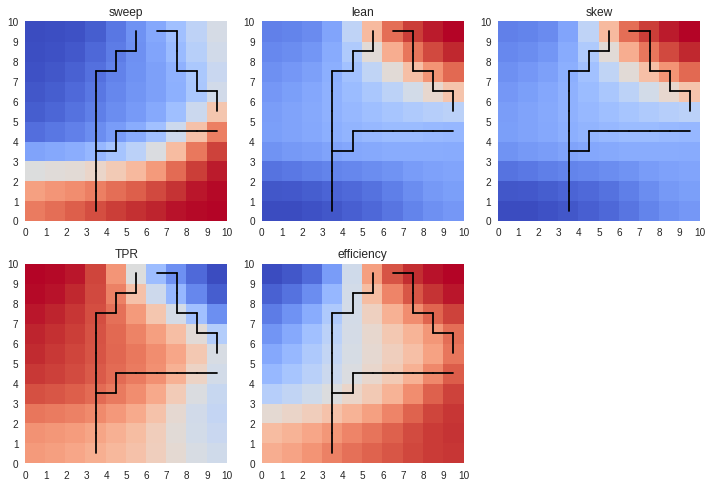

In [ ]:
features_names = ['sweep', 'lean', 'skew', 'TPR', 'efficiency']

plt.figure(figsize=(10, 10))
for i, f in enumerate(features_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i], cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
    for y in range(0, size-1):
        for x in range(0, size-1):
            if labels_[x, y] != labels_[x, y+1]:
                plt.plot([x+0.5, x+1.5], [y+1.5, y+1.5], c='black')
            if labels_[x, y] != labels_[x+1, y]:
                plt.plot([x+1.5, x+1.5], [y+0.5, y+1.5], c='black')
plt.tight_layout()
plt.show()

Let's try interpreting this map:

*   The objective functions (i.e., TPR and efficiency) are conflicting with each other. That is, you can obtain high TPR but the efficiency will decrease.
*   Efficiency can be maximized by increasing the lean and the skew (not so clear for sweep, though).
*   Finally, high TPR can be obtained by decreasing the sweep, the lean, and the skew. 



**That's all! Thanks for your attention**